In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Generate data
x = np.linspace(0, 2 * np.pi, 1000)
y = np.sin(x)

# Convert to PyTorch tensors
x_tensor = torch.tensor(x, dtype=torch.float32).view(-1, 1)  # Reshape to (num_samples, num_features)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)


In [ ]:
class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(1, 50)  # Input: 1 feature, Output: 50 features
        self.fc2 = nn.Linear(50, 1)  # Input: 50 features, Output: 1 feature

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Instantiate the model
model = SimpleNet()


In [ ]:
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)


In [ ]:
num_epochs = 5000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(x_tensor)
    loss = criterion(outputs, y_tensor)

    # Backpropagation and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 1000 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


In [ ]:
# Generate predictions
with torch.no_grad():
    predicted = model(x_tensor).numpy()

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Original Sine Curve')
plt.plot(x, predicted, label='Learned Curve', linestyle='dashed')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Original Sine vs. Learned Curve')
plt.show()


# Using LSTM

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Generate data
x = np.linspace(0, 2 * np.pi, 1000)
y = np.sin(x)

# Convert to PyTorch tensors
x_tensor = torch.tensor(x, dtype=torch.float32).view(-1, 1, 1)  # Reshape to (num_samples, sequence_length, num_features)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)

# Define the LSTM model
class LSTMNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers):
        super(LSTMNet, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])  # Take the output of the last time step
        return out

input_size = 1
hidden_size = 50
output_size = 1
num_layers = 1

# Instantiate the LSTM model
model = LSTMNet(input_size, hidden_size, output_size, num_layers)

# Choose Loss Function and Optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training Loop
num_epochs = 5000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(x_tensor)
    loss = criterion(outputs, y_tensor)

    # Backpropagation and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 1000 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')






In [ ]:
# Generate data
x_test = np.linspace(0, 16 * np.pi, 1000)
y_test = np.sin(x)

# Convert to PyTorch tensors
x_tensor_test = torch.tensor(x_test, dtype=torch.float32).view(-1, 1, 1)  # Reshape to (num_samples, sequence_length, num_features)
y_tensor_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)
# Generate predictions
with torch.no_grad():
    predicted = model(x_tensor_test).numpy()
# Plot the Results
plt.figure(figsize=(10, 6))
plt.scatter(x, y,s=2, label='Original Sine Curve')
plt.scatter(x_test, predicted,s=2, label='Learned Curve', linestyle='dashed')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Original Sine vs. Learned Curve')
plt.show()

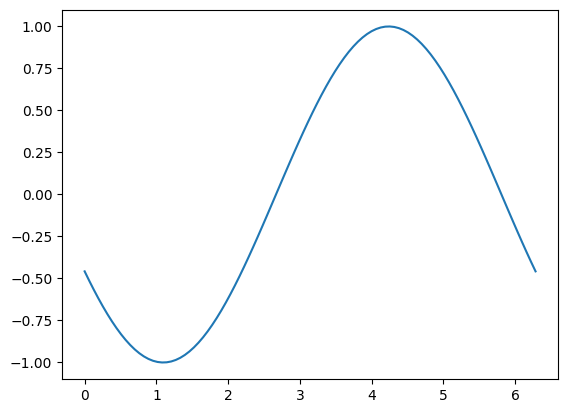

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.animation import PillowWriter

# Create a figure and axis
fig, ax = plt.subplots()

# Initialize the data
x = np.linspace(0, 2 * np.pi, 100)
y = np.sin(x)

# Initialize the plot elements (line in this case)
line, = ax.plot(x, y)

# Function to update the plot for each animation frame
def update(frame):
    line.set_ydata(np.sin(x + frame * 0.1))
    return line,

# Create the animation
ani = FuncAnimation(fig, update, frames=range(100), blit=True)

# Create a writer to save the animation as a video file
writer = PillowWriter(fps=20)
ani.save("sin_wave_animation.gif", writer=writer)

plt.show()


In [ ]:
import numpy as np
import plotly.graph_objects as go
import matplotlib.cm as cm
from matplotlib.colors import Normalize

# image dimensions (pixels)
n1 = 150 # height
n2 = 100 # width
# Generate an image starting from a numerical function
x, y = np.mgrid[-5:5:n1*1j, -3:3:n2*1j]
f = np.cos(x * y)

# use matplotlib to assign a colormap to the computed values
norm = Normalize(f.min(), f.max())
norm_f = norm(f)
# generate the image:
# img has a shape of (150, 100, 4).
# The four channels are R, G, B, alpha
# All values will be between 0 and 1
img = cm.viridis(norm_f)

# convert the image to values between 0 and 255
# this is required by go.Image
img = (img * 255).astype(int)

# Create the image
fig = go.Figure(data=[
        go.Image(
            # Note that you can move the image around the screen
            # by setting appropriate values to x0, y0, dx, dy
            x0=x.min(),
            y0=y.min(),
            dx=(x.max() - x.min()) / n2,
            dy=(y.max() - y.min()) / n1,
            z=img
        )
    ],
    layout={
        # set equal aspect ratio and axis labels
        "yaxis": {"scaleanchor": "x", "title": "y"},
        "xaxis": {"title": "x"}
    }
)
fig